In [ ]:
# 1. Install/Upgrade Scikit-learn (if necessary for Colab environment)
!pip install -U scikit-learn

# 2. Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# 3. Upload the file
print("Please upload your 'wine.data' TXT file:")
uploaded = files.upload()

# 4. Read the file
filename = next(iter(uploaded))

# The raw wine.data has no header, is comma-separated, and the CLASS label is the FIRST column (index 0).
df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None)

# 5. Define Feature and Target variables
# The target variable y is the first column (index 0).
y = df.iloc[:, 0] - 1 # Subtract 1 to make classes 0, 1, 2 (as required by most ML libraries)

# The features X are the remaining 13 columns (index 1 to 13).
X = df.iloc[:, 1:]

# Define feature names for clarity in EDA (from the UCI description)
feature_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X.columns = feature_names
target_names = ['Class 1', 'Class 2', 'Class 3'] # Original classes were 1, 2, 3

print("Dataset loaded successfully.")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target classes (Internal): {np.unique(y)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
Please upload your 'wine.data' TXT file:


Saving wine.data.txt to wine.data.txt
Dataset loaded successfully.
Features shape: (178, 13)
Target shape: (178,)
Target classes (Internal): [0 1 2]



Dataset Information (Data Types and Missing Values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline   

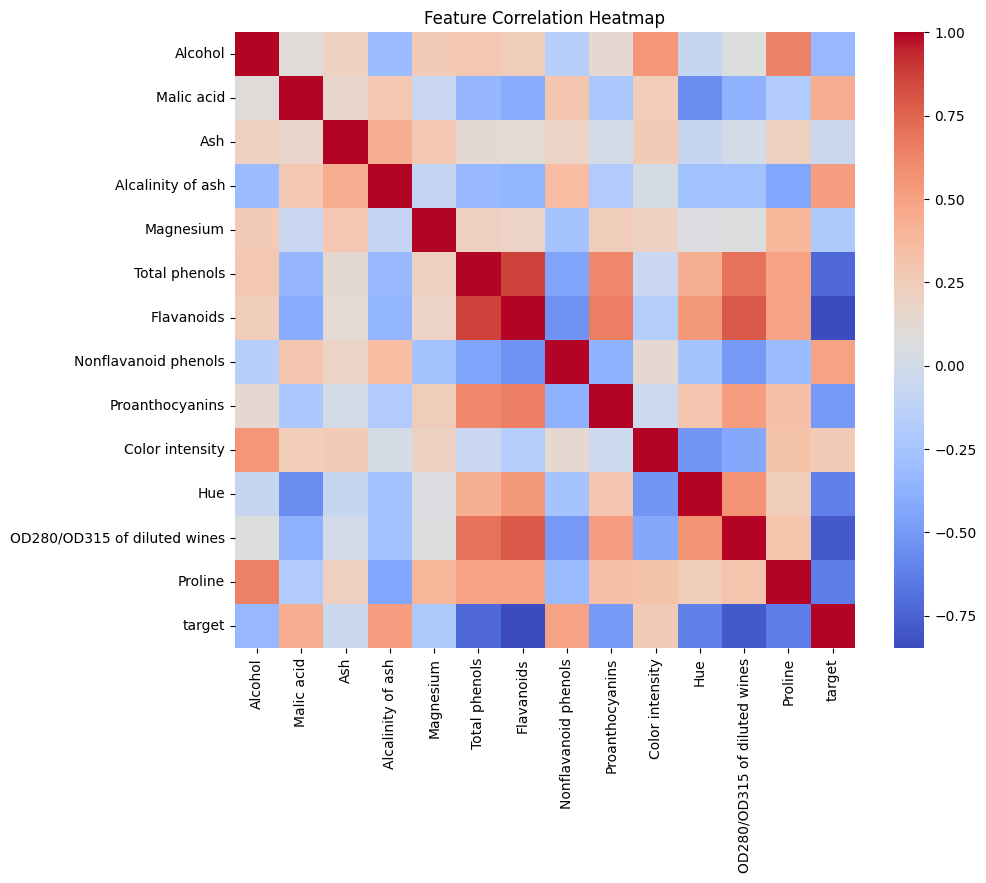

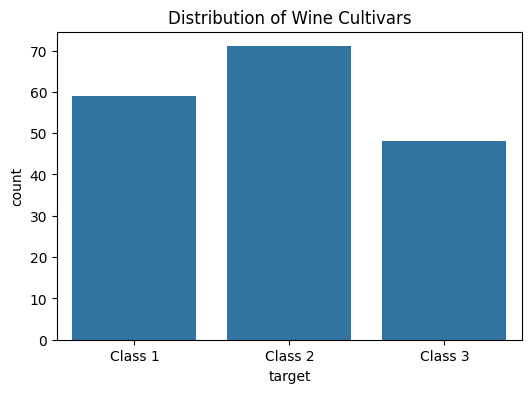

In [ ]:
# Cell 2: Exploratory Data Analysis (EDA)
# Combine X and y back into a single DataFrame for convenient EDA
df_eda = X.copy()
df_eda['target'] = y

# 1. Inspect data types and check for missing values
print("\nDataset Information (Data Types and Missing Values):")
print(df_eda.info())
# (Note: Sklearn datasets are generally clean, but this checks the uploaded file)

# 2. Descriptive Statistics
print("\nDescriptive Statistics:")
print(df_eda.describe())

# 3. Correlation Matrix (To understand feature relationships)
plt.figure(figsize=(10, 8))
sns.heatmap(df_eda.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Distribution of the Target Variable (Class balance)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_eda)
plt.xticks(ticks=[0, 1, 2], labels=target_names)
plt.title("Distribution of Wine Cultivars")
plt.show()

In [ ]:
#Cell 3: Preprocessing (Split and Scale)...We prepare the data for the modeling phase.

# 1. Split the data (using numpy arrays for scikit-learn)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42, stratify=y)

# 2. Scale the features (Crucial for SVM and Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training features shape after scaling: {X_train_scaled.shape}")
print(f"Testing features shape after scaling: {X_test_scaled.shape}")

Training features shape after scaling: (142, 13)
Testing features shape after scaling: (36, 13)


In [ ]:
# Cell 4: Classical ML Comparison (LR, DT, SVM)
# Initialize models
models = {
    "Logistic Regression (LR)": LogisticRegression(random_state=42, max_iter=200),
    "Decision Tree (DT)": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel='linear', random_state=42)
}

print("--- Comparing Classical ML Models ---")
results = {}

for name, model in models.items():
    # Train the model (using scaled data for LR and SVM)
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = accuracy
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=target_names)}")

# Display best performing model
best_model = max(results, key=results.get)
print(f"⭐ Best Classical Model: {best_model} with Accuracy: {results[best_model]:.4f}")

--- Comparing Classical ML Models ---

Model: Logistic Regression (LR)
Accuracy: 0.9722
Classification Report:
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        12
     Class 2       0.93      1.00      0.97        14
     Class 3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Model: Decision Tree (DT)
Accuracy: 0.9444
Classification Report:
              precision    recall  f1-score   support

     Class 1       1.00      0.92      0.96        12
     Class 2       0.88      1.00      0.93        14
     Class 3       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


Model: Support Vector Machine (SVM)
Accuracy: 0.9444
Classi

In [ ]:
# Cell 5: Neural Network Preprocessing...Prepare the target variable for Keras.
# Convert integer labels (0, 1, 2) to one-hot encoded vectors
# e.g., 0 -> [1, 0, 0]
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Check the new shape of the target
print(f"One-hot encoded training target shape: {y_train_one_hot.shape}")

One-hot encoded training target shape: (142, 3)


In [ ]:
# Cell 6: Build, Compile, and Train Keras Model...Build and train the Feed-forward Neural Network (ANN).
# Get the number of features (13) and classes (3)
input_dim = X_train_scaled.shape[1]
num_classes = y_train_one_hot.shape[1]

# Build the ANN model
model_nn = keras.Sequential([
    # Input Layer (13 features) and First Hidden Layer
    keras.layers.Dense(32, activation='relu', input_shape=(input_dim,)),

    # Second Hidden Layer
    keras.layers.Dense(16, activation='relu'),

    # Output Layer (3 neurons, using softmax for probabilities)
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model_nn.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

model_nn.summary()

# Train the model
history = model_nn.fit(
    X_train_scaled,
    y_train_one_hot,
    epochs=50,
    batch_size=16,
    validation_data=(X_test_scaled, y_test_one_hot),
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027 (4.01 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3624 - loss: 1.1903 - val_accuracy: 0.3889 - val_loss: 1.1084
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5073 - loss: 1.0505 - val_accuracy: 0.4444 - val_loss: 1.0169
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6570 - loss: 0.9620 - val_accuracy: 0.6111 - val_loss: 0.9333
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6579 - loss: 0.8708 - val_accuracy: 0.6944 - val_loss: 0.8504
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7966 - loss: 0.7766 - val_accuracy: 0.7778 - val_loss: 0.7696
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8692 - loss: 0.6895 - val_accuracy: 0.8333 - val_loss: 0.6858
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8888 - loss: 0.6078 - val_accuracy: 0.8611 - val_loss: 0.6053
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9442 - loss: 0.5233 - val_accuracy: 0.9167 - val_loss: 0.5244



Neural Network Test Accuracy: 1.0000
Neural Network Test Loss: 0.0453
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

Neural Network Classification Report:
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        12
     Class 2       1.00      1.00      1.00        14
     Class 3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



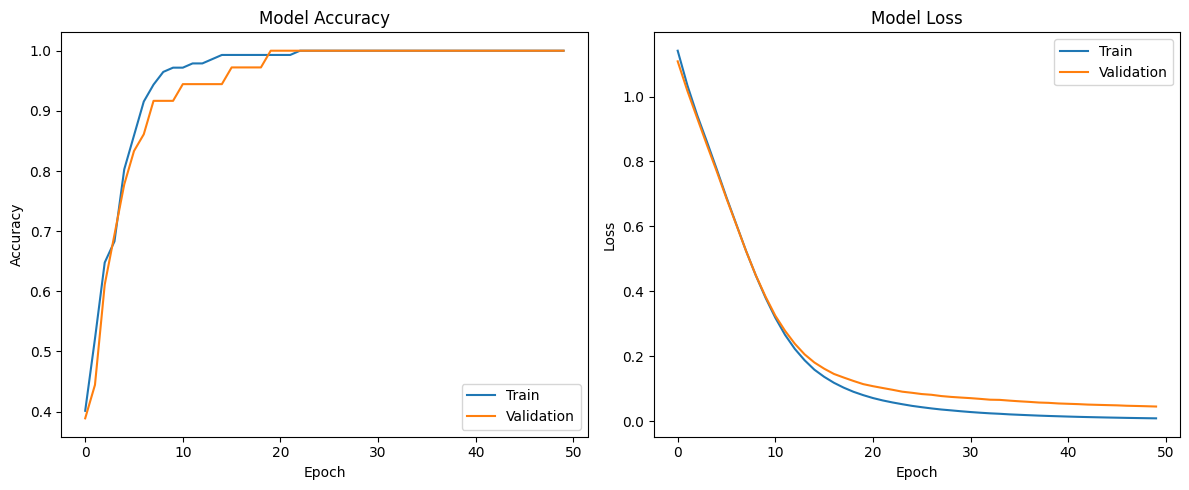


Neural Network Model saved as 'wine_cultivar_model.h5'


In [ ]:
# Cell 7: Neural Network Evaluation and Visualization...This provides the final metrics and required visualization
# 1. Evaluate on the test set
loss, accuracy = model_nn.evaluate(X_test_scaled, y_test_one_hot, verbose=0)
print(f"\nNeural Network Test Accuracy: {accuracy:.4f}")
print(f"Neural Network Test Loss: {loss:.4f}")

# 2. Get predictions and generate a full report
y_pred_prob = model_nn.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# 3. Visualize Training History (Learning Curve)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 4. Save the Keras model
model_nn.save("wine_cultivar_model.h5")
print("\nNeural Network Model saved as 'wine_cultivar_model.h5'")